# Dimensionality Reduction-4

#### Assignment: PCA Implementation
* **Objective:**
    * The objective of this assignment is to implement PCA on a given dataset and analyse the results.
* **Instructions:**
    * Download the wine dataset from the UCI Machine Learning Repository
        ***(https://archive.ics.uci.edu/ml/datasets/Wine).***
    * Load the dataset into a Pandas dataframe.
    * Split the dataset into features and target variables.
    * Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
    * Implement PCA on the preprocessed dataset using the scikit-learn library.
    * Determine the optimal number of principal components to retain based on the explained variance ratio.
    * Visualise the results of PCA using a scatter plot.
    * Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
    * Interpret the results of PCA and clustering analysis.
* **Deliverables:**
    * Jupyter notebook containing the code for the PCA implementation.
    * A report summarising the results of PCA and clustering analysis.
    * Scatter plot showing the results of PCA.
    * A table showing the performance metrics for the clustering algorithm.
* **Additional Information:**
    * You can use the python programming language.
    * You can use any other machine learning libraries or tools as necessary.
    * You can use any visualisation libraries or tools as necessary.

In [1]:
import pandas as pd
import numpy as ny
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA
import matplotlib.pyplot as pt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
col = ["Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280/OD315_of_diluted_wines", "Proline"]
ds = pd.read_csv(url, names = col)
X,y=ds.drop('Class', axis=1), ds['Class']
ds.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Data Preprocessing
scale = ss()
x = scale.fit_transform(X)
ds.isnull().sum()

Class                           0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280/OD315_of_diluted_wines    0
Proline                         0
dtype: int64

**NO missing value**

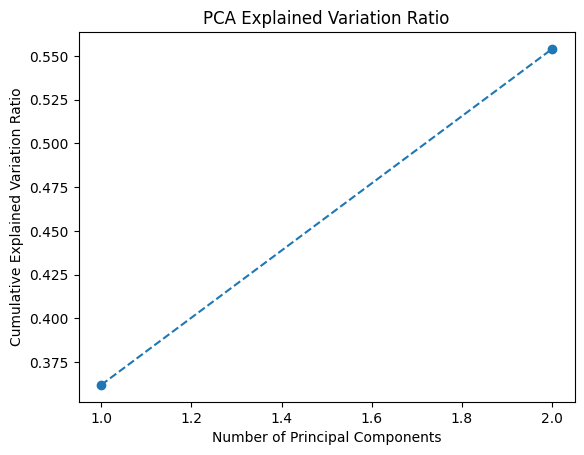

In [4]:
# Implementing PCA
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x)

# For finding Optimal Number of Principal Components
v_ratio = pca.explained_variance_ratio_
cum_v_ratio = v_ratio.cumsum()
pt.plot(range(1,len(v_ratio)+1), cum_v_ratio, marker="o", linestyle='--')
pt.xlabel('Number of Principal Components')
pt.ylabel('Cumulative Explained Variation Ratio')
pt.title('PCA Explained Variation Ratio')
pt.show()

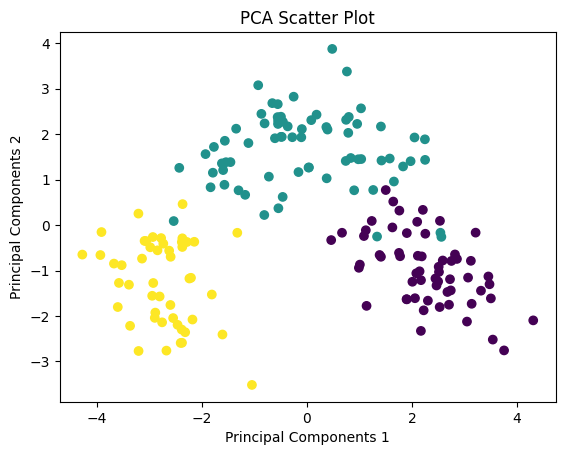

In [5]:
# Visualizing Results with Scatter Plot
pt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap='viridis')
pt.xlabel('Principal Components 1')
pt.ylabel('Principal Components 2')
pt.title('PCA Scatter Plot')
pt.show()

In [6]:
# Fitting and Evalaution of model
model = KMeans(n_clusters=3, random_state=57)
cluster = model.fit_predict(x_pca)
sm = silhouette_score(x_pca,cluster)
inertia = model.inertia_

# Create a DataFrame for the performance metrics
performance_metrics = pd.DataFrame({"Metric":["Silhouette Score", "Inertia"], "Value": [sm, inertia]})

# Display the table
print(performance_metrics)

C:\Users\SALESKEN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


             Metric       Value
0  Silhouette Score    0.561051
1           Inertia  259.509381
